<h1>Transformation des données et réalisation d'un clustering</h1>
<h2>Transformation des données</h2>
Les données sont organisées avec chaque mutation dans chaque lignée cellulaire par ligne
Je les transforme pour avoir en colonne les genes concernés par des mutations et en ligne chaque lignée
Si une mutation quelle qu'elle soit est présente dans un gene dans une lignée alors je donne la valeur 1
Au contraire s'il n'y a aucune mutation décrite dans les données, j'attribue un 0
<h2>Clutering</h2>
La réalisation d'un clustering hierarchique ne donne pas de groupe chaque lignée étant très différente sur les 236 genes contenant des mutations;
En réalisant un graphique Elbow il n'y a pas de point d'inflexion de la courbe

In [31]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

236


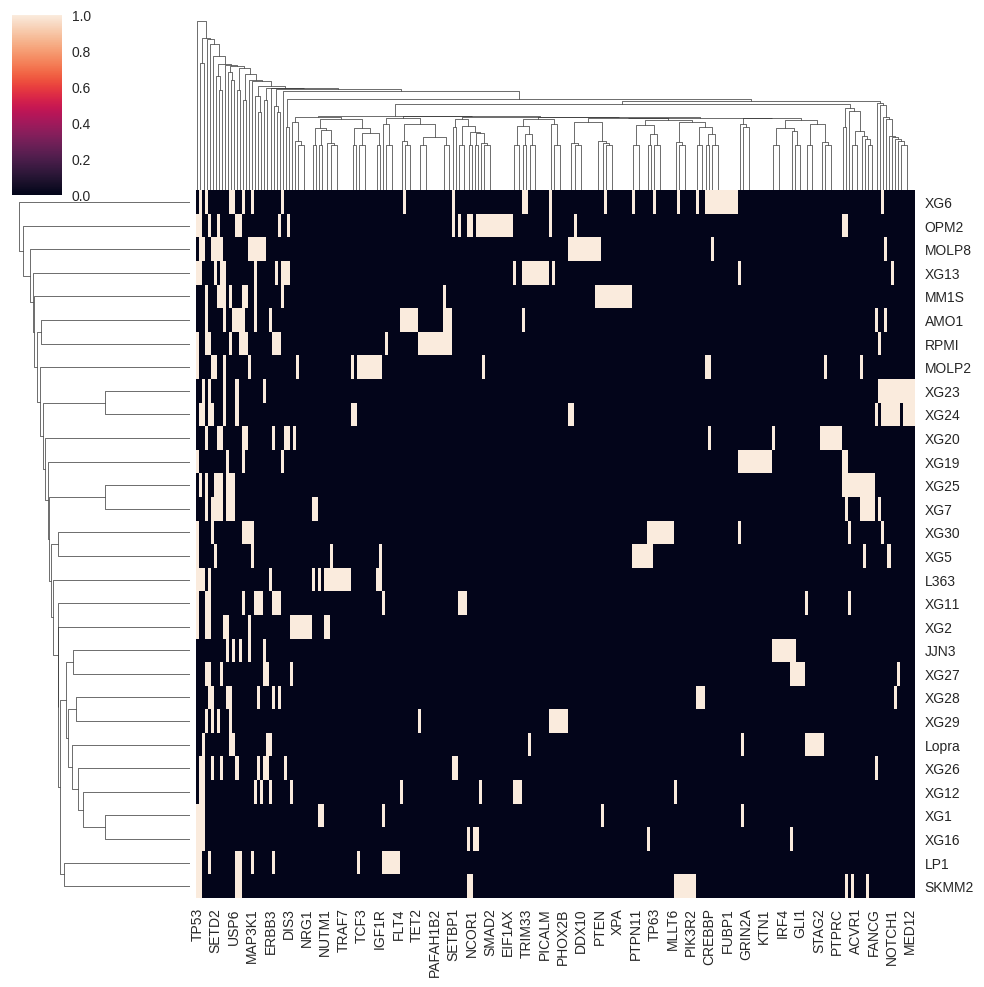

In [44]:
f=open("/home/buffard/Seafile/data/table_S4_mutations.csv","r")
f.readline()
cell_lines={}
genes=set()
for line in f:
    column=line.split(";")
    if column[0] in cell_lines:
        cell_lines[column[0]].append(column[1])
    else:
        cell_lines.update({column[0]:[column[1]]})
    genes.add(column[1])
f.close()

g=open("cell_lines_mutations_matrix.csv","w")
g.write(";")
for gene in genes:
    g.write(gene+";")
g.write("\n")

names=np.array([])
print (len(genes))

Y=list()
for cell_line in cell_lines.keys():
    g.write(cell_line+";")
    X=[]
    
    names=np.append(names,cell_line)
    for gene in genes:
        if gene in cell_lines[cell_line]:
            g.write("1;")
            X.append(1)
        else:
            g.write("0;")
            X.append(0)
    
    g.write("\n")
    Y.append(X)

g.close()

matrix=np.array(Y)
df= pd.DataFrame(matrix, index=cell_lines.keys(),columns=list(genes))

hierachic_cluster=sns.clustermap(df)
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering.png") 




    

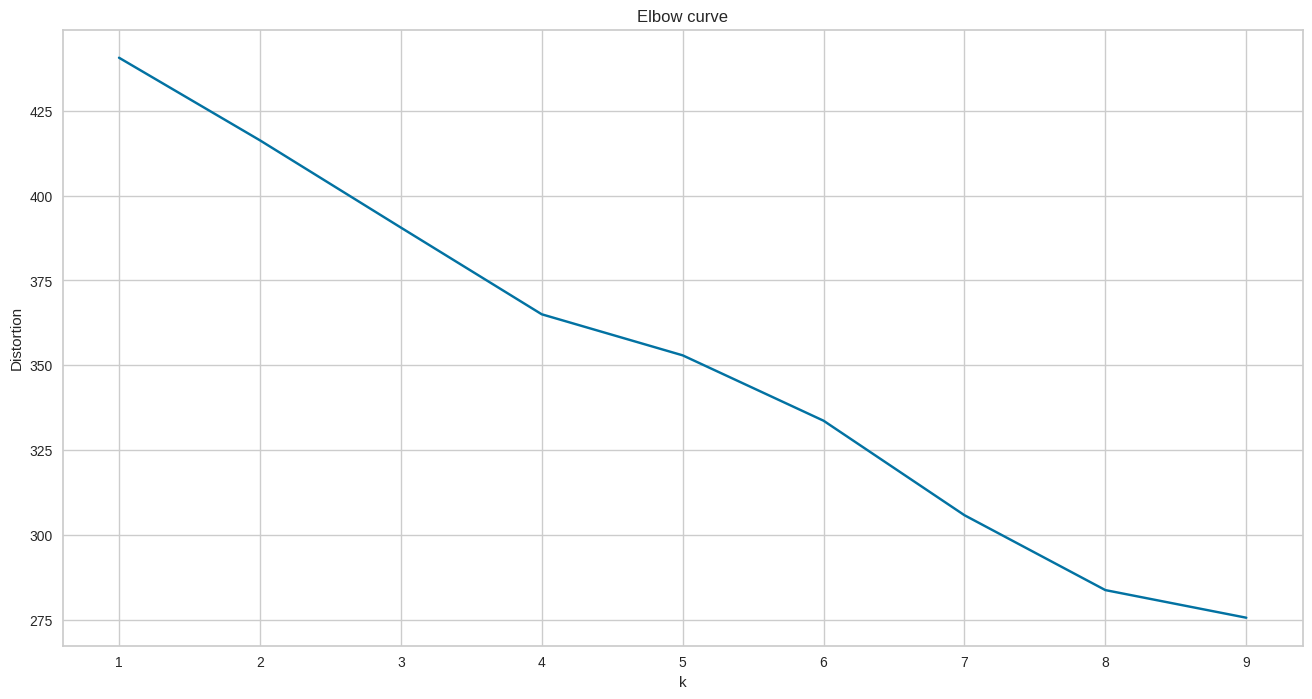

In [49]:
distortions = []
K=range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()

